In [2]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

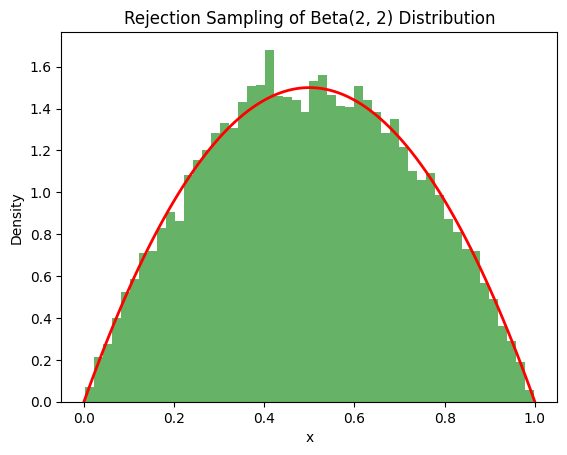

In [3]:
# q1 Simulating a Beta(2, 2) random variable using the rejection method
n = 100_000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
y_inside = y <= x * (1 - x)

# accepted samples
x_acc = x[y_inside]

# plot histogram of accepted samples
plt.hist(x_acc, bins=50, density=True, alpha=0.6, color='g')

# plot the Beta(2, 2) density for comparison
x_vals = np.linspace(0, 1, 100)
beta_pdf = stats.beta.pdf(x_vals, 2, 2)
plt.plot(x_vals, beta_pdf, 'r-', lw=2)

plt.title('Rejection Sampling of Beta(2, 2) Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

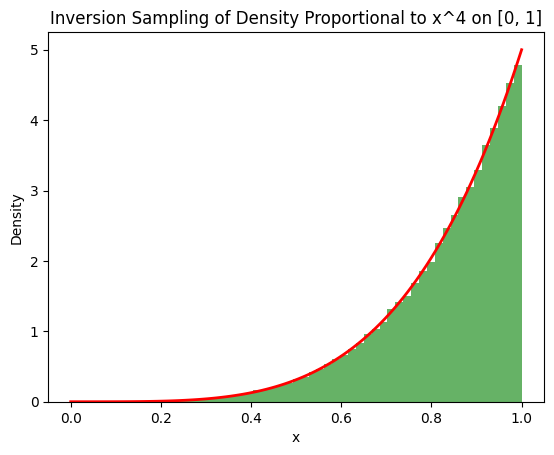

In [8]:
# q2 Simulating a random variable with density f(x) proportion to x^4 on [0, 1] using the inversion method.

inv_cdf = lambda u: u**(1/5) 
u = np.random.uniform(0, 1, n)
x_samples = inv_cdf(u)

# plot histogram of samples
plt.hist(x_samples, bins=50, density=True, alpha=0.6, color='g')

# plot the target density for comparison
x_vals = np.linspace(0, 1, 100)
target_pdf = 5 * x_vals**4
plt.plot(x_vals, target_pdf, 'r-', lw=2)

plt.title('Inversion Sampling of Density Proportional to x^4 on [0, 1]')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

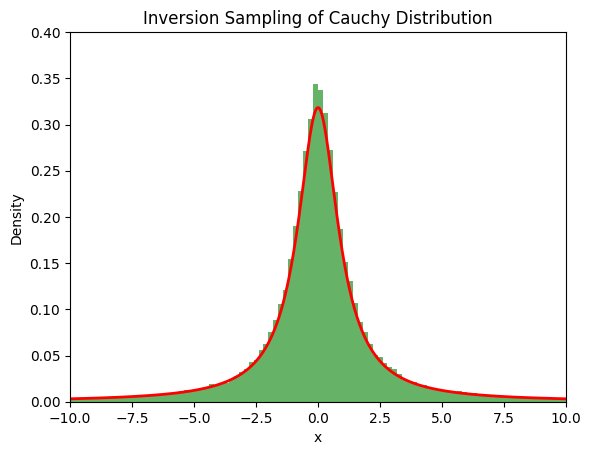

In [7]:
# q3 Cauchy Distribution

inv_cdf_cauchy = lambda u: np.tan(np.pi * (u - 0.5))
u = np.random.uniform(0, 1, n)
x_cauchy = inv_cdf_cauchy(u)

# plot histogram of samples
plt.hist(x_cauchy, bins=100, density=True, alpha=0.6, color='g', range=(-10, 10))

# plot the Cauchy density for comparison
x_vals = np.linspace(-10, 10, 1000)
cauchy_pdf = stats.cauchy.pdf(x_vals)
plt.plot(x_vals, cauchy_pdf, 'r-', lw=2)

plt.title('Inversion Sampling of Cauchy Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.xlim(-10, 10)
plt.ylim(0, 0.4)
plt.show()

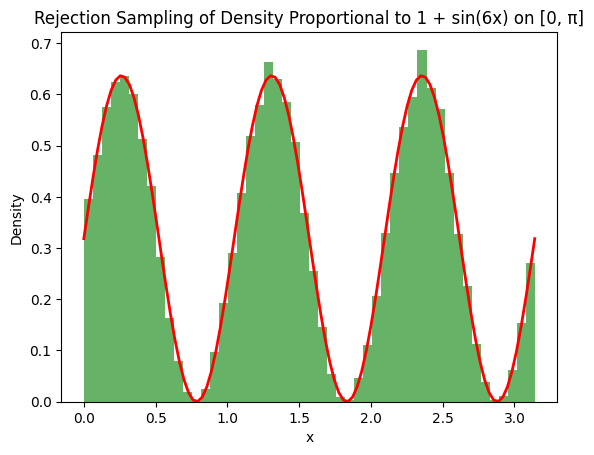

In [ ]:
# q5 Sine Distribution

x = np.random.uniform(0, np.pi, n)
y = np.random.uniform(0, 2, n)

y_inside = y <= 1 + np.sin(6 * x)

x_acc = x[y_inside]

# plot histogram of accepted samples
plt.hist(x_acc, bins=50, density=True, alpha=0.6, color='g')

# plot the target density for comparison
x_vals = np.linspace(0, np.pi, 100)
target_pdf = (1 + np.sin(6 * x_vals)) / (np.pi)
plt.plot(x_vals, target_pdf, 'r-', lw=2)

plt.title('Rejection Sampling of Density Proportional to 1 + sin(6x) on [0, π]')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

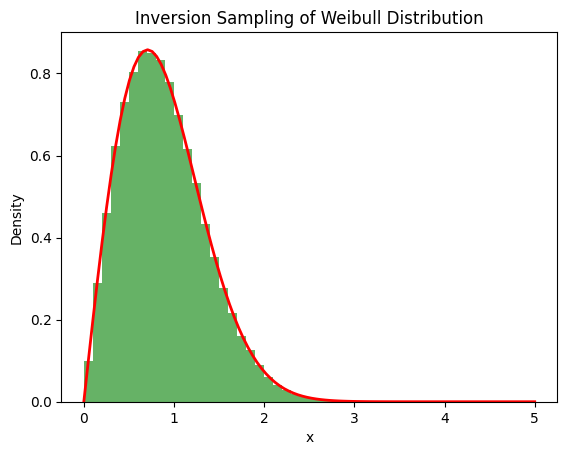

In [15]:
# q6 Weibull Distribution
lambda_weibull = 1.0
alpha_weibull = 2.0
inv_cdf_weibull = lambda x: (-np.log(1 - x) )**(1/alpha_weibull) * lambda_weibull

x = np.random.uniform(0, 1, n)
weibull_samples = inv_cdf_weibull(x)

# plot histogram of samples in range [0, 5]
plt.hist(weibull_samples, bins=50, density=True, alpha=0.6, color='g', range=(0, 5))
# plot the Weibull density for comparison
x_vals = np.linspace(0, 5, 100)
weibull_pdf = stats.weibull_min.pdf(x_vals, alpha_weibull, scale=lambda_weibull)
plt.plot(x_vals, weibull_pdf, 'r-', lw=2)

plt.title('Inversion Sampling of Weibull Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

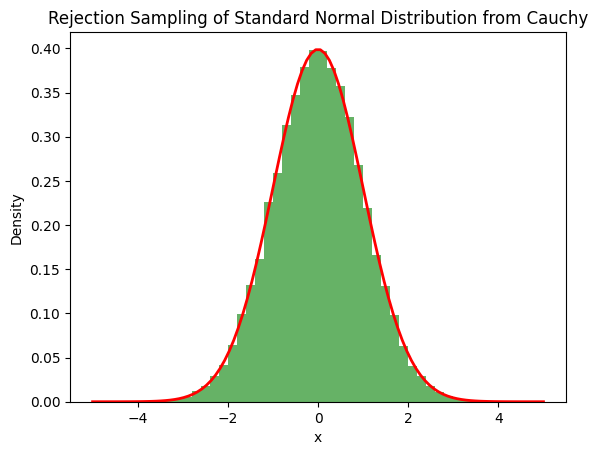

In [ ]:
# q7 Gaussian from a Cauchy

x = np.random.standard_cauchy(n)
y = np.random.standard_cauchy(n) # transform into uniform on (0, 1) via inversion
y = (np.arctan(y) + np.pi/2) / np.pi * stats.cauchy.pdf(x) * 2

y_inside = y <= np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
x_acc = x[y_inside]

# plot histogram of accepted samples
plt.hist(x_acc, bins=50, density=True, alpha=0.6, color='g', range=(-5, 5))

# plot the standard normal density for comparison
x_vals = np.linspace(-5, 5, 100)
normal_pdf = stats.norm.pdf(x_vals)
plt.plot(x_vals, normal_pdf, 'r-', lw=2)

plt.title('Rejection Sampling of Standard Normal Distribution from Cauchy')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

C:\Users\ningc\AppData\Local\Temp\ipykernel_27452\129713087.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


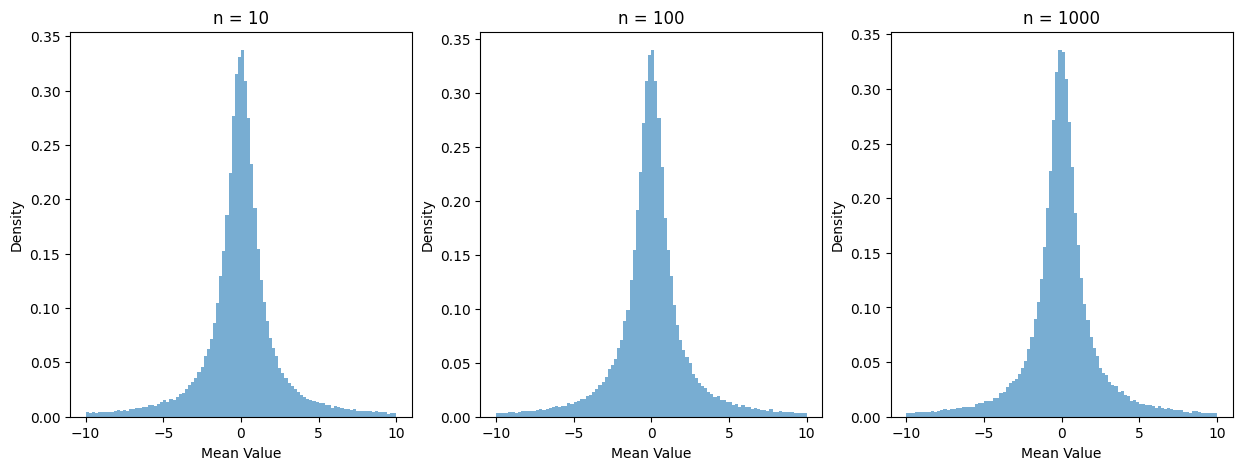

In [32]:
# q8 Averaging Cauchy random variables

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

m = [10, 100, 1000]

for i in range(3):
    cauchy_samples = np.random.standard_cauchy((n, m[i]))
    cauchy_means = np.mean(cauchy_samples, axis=1)

    # plot histogram of means
    ax[i].hist(cauchy_means, bins=100, density=True, alpha=0.6, range=(-10, 10))
    ax[i].set_title(f'n = {m[i]}')
    ax[i].set_xlabel('Mean Value')
    ax[i].set_ylabel('Density')

fig.show()


The average of $n$ i.i.d. Cauchy random variables is also a Cauchy random variable of the same shape. This can be proved by considering the characteristic function.